# Assignment 3

In this assignment, we want to build a L-layer (input layer, L-1 hidden layers and output layer, it should be noted that in some descriptions input layer might not be counted in L) neural network for two-classification problem.

For activation function in each layer (except the output layer), we use Relu. For output layer, the activation function is sigmoid.

The whole model structure is INPUT->[LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID

**Problem 1.** Given dim of each layer (layer_dims), initialize parameters of each layer (Hint: You can try other parameter initialization methods, such as Xavier initialization,He initialization and so on).

<img src="layer.JPG" width=700, heigth=400/>

In [72]:
import numpy as np
def initialize_parameters(layer_dims):
    """
    layer_dims--a list, record dim of each layer
    layer_dim=[]
    parameters--a dictionary, record the parameter of each layer
    """
    L=len(layer_dims)
    parameters={}
    for l in range(1,L): # initialize from layer 1 to layer L
        parameters['W'+str(l)]= np.random.randn(layer_dims[l],layer_dims[l-1])*0.1
        parameters['b'+str(l)]= np.random.randn(layer_dims[l],1)*0.1

    return parameters


**Problem 2.** Implement the forward propagation of the LINEAR->ACTIVATION layer
$$Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}$$
$$A^{[l]}=activation(Z^{[l]})$$

In [64]:
def Linear_active_forward(pre_A,W,b,activation):
    """
    pre_A--output from the last layer  // 应该是previous 不是 last
    W,b-- parameters of the current layer
    activation--type of activation function
    return:
    A--output of the activation function
    cache--record the linear_cache and activation_cache
    """
    ###calculate the linear output
    Z= W @ pre_A + b # shape(nl,1)
    linear_cache=(pre_A,W,b)
    ###calculate the output of activation function
    if activation=='relu':
        A= relu(Z)
        activation_cache=Z
    if activation=='sigmoid':
        A= sigmoid(Z)
        activation_cache=Z
    
    cache=(linear_cache,activation_cache)
    
    return A,cache 
        

def relu(x):
    return np.maximum(0, x)
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

**Problem 3.** Implement the forward propogation of the whole model.


In [26]:
def forward(X,parameters):
    """
    X--data
    parameters--parameter of each layer
    return:
    AL-- output of last layer(activation output)
    caches--list, record the cache from each layer
    """
    
    caches=[]
    A=X # A0
    L=len(parameters)//2
    for l in range(1, L):
        pre_A = A
        ### Linear->Relu forward
        A, cache =  Linear_active_forward(pre_A,parameters['W'+str(l)],parameters['b'+str(l)],'relu')
        caches.append(cache)
    
    ### Linear->Sigmoid forward
    AL, cache =  Linear_active_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    
    return AL,caches 
    
    

In [27]:
a = {'a':1,'2':2}
len(a)
L=2
str(L)

'2'

**Problem 4** Compute the logistic cost


In [28]:
def cost(AL,Y):
    """
    AL--the predicted probability
    Y--true lable
    return:
    cost--a number
    """
    AL=AL.reshape(Y.shape)
    a = Y.shape[0]
    b = Y.shape[1]
    if a > b:
        m = a
    else:
        m = b
    cost = (-1/m)*np.sum(Y * np.log(AL+1e-5) + (1 - Y) * (np.log(1-AL+1e-5))) # 添加正则化，防止溢出
    return cost


**Problem 5** Implement linear backward.
<br />
For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).
<br />
Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.
<br />
The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$
**use the above 3 formulations to implement linear_backward()**

In [29]:
def linear_backward(dZ,cache):
    """
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    
    Returns:
    dA_pre -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l),same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    pre_A, W, b = cache
 
    m = dZ.shape[1]
    #print(m)
    dW = (1/m) * (dZ @ pre_A.T)
    db = (1/m) * np.sum(dZ,axis=1,keepdims=True)
    #dA_pre = W.T @ dZ
    dA_pre = np.dot(W.T,dZ)
    ###calculate dW,db,dA_pre

    
    return dA_pre,dW,db

**Problem 6** 
1. Implements the backward propagation for Sigmoid and Relu unit.
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

2. Implement the backpropagation for the LINEAR->ACTIVATION layer

In [30]:
(1-sigmoid([1,2,3]))@sigmoid([1,2,3])

0.34678217837590053

In [31]:
def sigmoid_backward(dA,activation_cache):
    '''
    dA--Gradient of the cost with respect to the activation (of the current layer l)
    activation_cache--linear output of the current layer l
    return:
    dZ--Gradient of the cost with respect to the linear output (of current layer l)
    '''
    ###compute gradient dZ 
    dZ = dA * (sigmoid(activation_cache)*(1-sigmoid(activation_cache)))
    return dZ

In [32]:
def relu_backward(dA,activation_cache):
    '''
    dA--Gradient of the cost with respect to the activation (of the current layer l)
    activation_cache--linear output of the current layer l
    return:
    dZ--Gradient of the cost with respect to the linear output (of current layer l)
    '''
    ###compute gradient dZ
    v = np.ones(activation_cache.shape)
    v[activation_cache <= 0] = 0
    dZ = dA * v
    return dZ

In [33]:
t = np.array([1,-2,3])
v = t.copy()
v[t <= 0] = 0
v

array([1, 0, 3])

In [34]:
def linear_active_backward(dA,cache,activation):
    """
    dA--Gradient of the cost with respect to the activation (of the current layer l)
    cache--tuple of values (linear_cache, activation_cache)
    Returns:
    dA_pre -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l),same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache,activation_cache=cache
    if activation=='relu':
        ###calculate dZ,dA_pre, dW, db
        dA_pre,dW,db=linear_backward(relu_backward(dA,activation_cache),linear_cache)
    if activation=='sigmoid':
        ###calculate dZ,dA_pre, dW, db
        dA_pre,dW,db=linear_backward(sigmoid_backward(dA,activation_cache),linear_cache)
        
    return dA_pre, dW, db
        

**Problem 7.** Implement the backward function for the whole network.
<br />
To backpropagate through this network, we know that the output is $A^{[L]} = Sigmoid(Z^{[L]})$. we give the code to compute  $dA^{[L]}= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$

In [49]:
def backward(AL, Y, caches):
    """
    AL -- probability vector, output of the forward propagation (forward())
    Y -- true label
    caches -- list of caches containing: every cache of linear_activation_forward() with "relu" and the cache of linear_activation_forward() with "sigmoid"
    Returns:
    grads -- A dictionary with the gradients
    grads["dA" + str(l)] = ...
    grads["dW" + str(l)] = ...
    grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(AL.shape)
    dAL= - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ###compute the parameter gradients of the output layer (Linear->sigmoid)
    current_cache=caches[L-1]
    grads["dA" + str(L-1)],grads["dW" + str(L)],grads["db" + str(L)] = linear_active_backward(dAL,current_cache,'sigmoid')
    grads["dA" + str(L)] = dAL
    ### calculate the parameter gradients(dA,dW,db) of the remaining layers(linear->relu)
    for l in reversed(range(1,L)):
        ###your code
        current_cache=caches[l-1]
        grads["dA" + str(l-1)],grads["dW" + str(l)],grads["db" + str(l)] = linear_active_backward(grads["dA" + str(l)],current_cache,'relu')
    return grads

In [48]:
t = reversed(range(1,3))
for i in t:
    print(i)
"dW"+str(1)

2
1


'dW1'

**Problem 7** Implement “update_parameters()” to update all parameters using gradient descent.

In [37]:
def update_parameters(parameters,grads,learning_rate):
    L = len(parameters)//2
    for i in range(1,L+1):
        parameters['W'+str(i)] = parameters['W'+str(i)] - grads['dW'+str(i)]*learning_rate
        parameters['b'+str(i)] = parameters['b'+str(i)] - grads['db'+str(i)]*learning_rate
    return parameters
    

**Problem 8** Implement the predict() function.

In [38]:
def predict(X,parameters):
    """
    X--data
    parameters: updated parameters
    return:
    pred: a binary vector [1,X.shape[1]]
    """
    AL,caches=forward(X,parameters)
    pred = np.zeros(AL.shape)
    pred[AL>=0.5] = 1
    return pred


**Problem 9** merge above functions into one, implement model() function.

In [59]:
def model(X,Y,layer_dims,learning_rate,num_iterations):
    np.random.seed(1)
    costs = [] 
    ### Parameters initialization.
    ###your code
    parameters=initialize_parameters(layer_dims)
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        ### Forward propagation: INPUT->[LINEAR -> RELU]*(L-1) -> LINEAR ->SIGMOID.
        ### your code
        AL,caches=forward(X,parameters)
    
        ### Compute cost.
        current_cost=cost(AL,Y)
        #print(current_cost)
        costs.append(current_cost)
        ### Backward propagation.
        ###your code
        grads = backward(AL, Y, caches)
        ### Update parameters.
        ### your code
        parameters=update_parameters(parameters,grads,learning_rate)

        if i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, current_cost))
        
    return parameters,costs




**Problem 10** Use a picture dataset to train the whole model. Here we give the preprocessing code.

In [40]:
def load_data():
    
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [41]:
##preproccessing code
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
#matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.



In [42]:
train_x_flatten.shape

(12288, 209)

In [43]:
train_y.shape

(1, 209)

Cost after iteration 0: 0.683452
Cost after iteration 50: 0.669858
Cost after iteration 100: 0.656306
Cost after iteration 150: 0.650846
Cost after iteration 200: 0.648524
Cost after iteration 250: 0.646813
Cost after iteration 300: 0.645145
Cost after iteration 350: 0.643477
Cost after iteration 400: 0.641687
Cost after iteration 450: 0.639730
Cost after iteration 500: 0.637615
Cost after iteration 550: 0.635257
Cost after iteration 600: 0.632687
Cost after iteration 650: 0.629264
Cost after iteration 700: 0.625064
Cost after iteration 750: 0.619920
Cost after iteration 800: 0.613311
Cost after iteration 850: 0.604560
Cost after iteration 900: 0.594599
Cost after iteration 950: 0.582802
0.6555023923444976
0.34


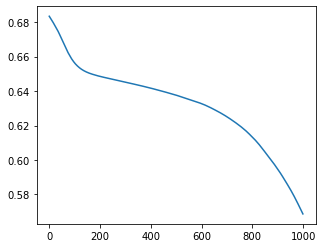

In [74]:
layer_dims = [12288, 20, 7, 5, 1]####you can change the dim of hidden layer, or the number of hidden layers
learning_rate=0.01
num_iterations=1000
parameters,costs=model(train_x,train_y,layer_dims,learning_rate,num_iterations)
pred_y = predict(train_x,parameters)
pred=predict(test_x,parameters)
###calculate accuracy
accuracy_tr=np.mean(pred_y==train_y)
accuracy_te=np.mean(pred==test_y)
print(accuracy_tr)
print(accuracy_te)
###plot the cost
###your code
plt.plot(costs)
plt.show()